# 4-2.Basic Statistics

### 평균(Mean), 중앙 값(Median)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([1, 6, 7, 8, 9])

mean = np.mean(data)
print("Mean: ", mean)

median = np.median(data)
print("Median: ", median)

variance = np.var(data)
print("Variance(σ^2): ", variance)

std_dev = np.std(data)
print("Standard Deviation(σ): ", std_dev)



Mean:  6.2
Median:  7.0
Variance(σ^2):  7.76
Standard Deviation(σ):  2.7856776554368237


### 정규 분포(가우시안 분포), 엔트로피, 정보, 교차 엔트로피

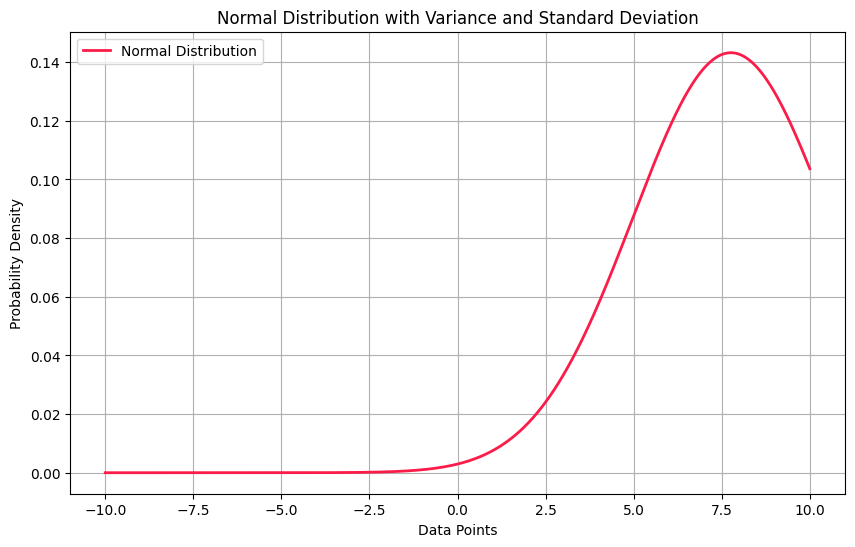

In [7]:
x = np.linspace(-10, 10, 1000)
y = (1 / (np.sqrt(2 * np.pi * std_dev**2))) * np.exp(-0.5 * ((x - variance) / std_dev)**2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', linewidth=2, color="#fc1c49ff")
plt.title('Normal Distribution with Variance and Standard Deviation')
plt.xlabel('Data Points')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

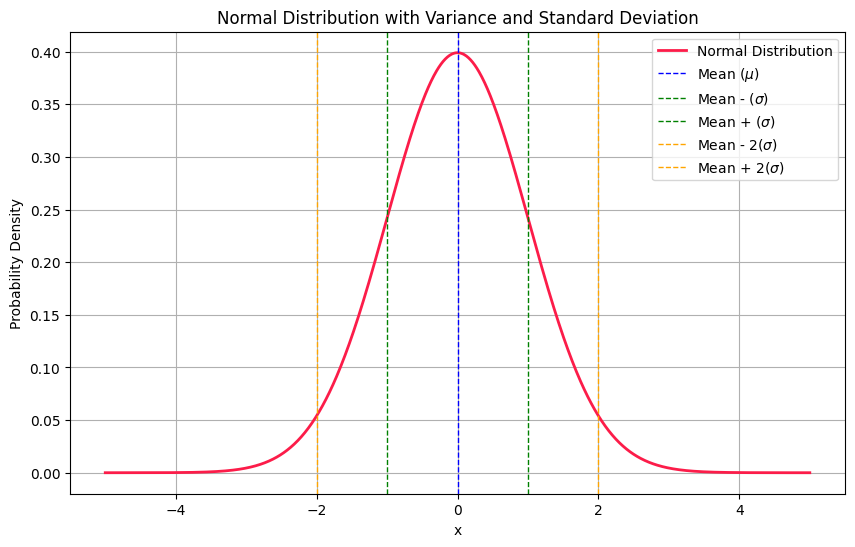

In [14]:
mean = 0
sigma = 1 # σ
x = np.linspace(-5, 5, 1000)
y = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((x - mean) / sigma)**2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', linewidth=2, color="#fc1c49ff")

plt.axvline(x=mean, color="blue", linestyle="--", linewidth=1, label="Mean ($\mu$)")
plt.axvline(x=mean - sigma, color="green", linestyle="--", linewidth=1, label="Mean - ($\sigma$)")
plt.axvline(x=mean + sigma, color="green", linestyle="--", linewidth=1, label="Mean + ($\sigma$)")
plt.axvline(x=mean - 2 * sigma, color="orange", linestyle="--", linewidth=1, label="Mean - 2($\sigma$)")
plt.axvline(x=mean + 2 * sigma, color="orange", linestyle="--", linewidth=1, label="Mean + 2($\sigma$)")

plt.title('Normal Distribution with Variance and Standard Deviation')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

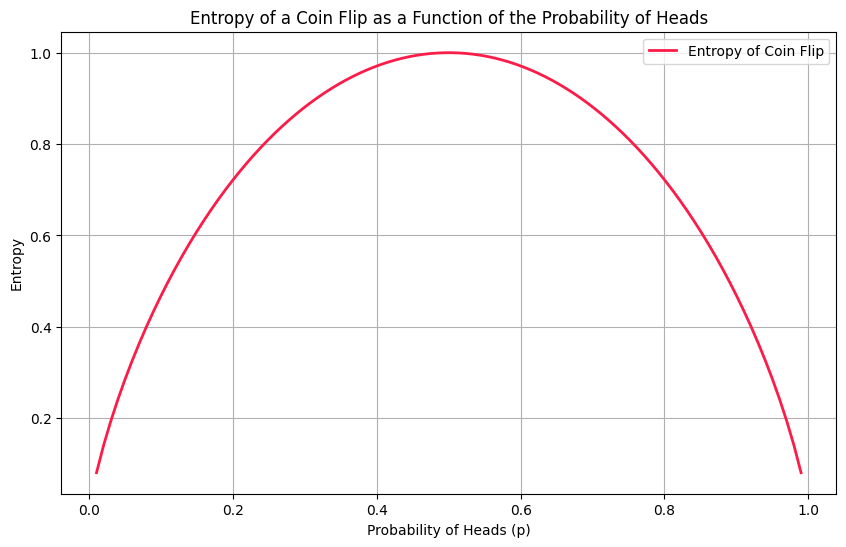

In [15]:
def entropy(p: float) -> float:
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# 동전 앞뒤 나올 확률 P의 범위
coinProbability = np.linspace(0.01, 0.99, 100)
entropies = [entropy(p) if p not in [0, 1] else 0 for p in coinProbability]

plt.figure(figsize=(10, 6))
plt.plot(coinProbability, entropies, label='Entropy of Coin Flip', linewidth=2, color="#fc1c49ff")
plt.title('Entropy of a Coin Flip as a Function of the Probability of Heads')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy')
plt.grid(True)
plt.legend()
plt.show()

# 4-3. 확률론

### 조건부 확률
- 표본공간 S
- 조건부 확률
  - 사건 B가 발생했다는 조건 상황에서 다른 사건 A가 발생할 확률
    - B가 일어났을 때 A가 일어날 확률
  - P(A|B) = P(A ∩ B) / P(B)
  - P(B|A) = P(A ∩ B) / P(A)
- P(A ∩ B)
  - P(A ∩ B) = P(A|B) * P(B)
  - P(A ∩ B) = P(B|A) * P(A)
  - A, B가 독립적일 때 : P(A ∩ B) = p(A) * P(B)
- (○, ●, ○, ○, ●, ●, ○, ●)
  - P(A) 빨간 공을 꺼낼 확률 : 1/2
  - P(A ∩ B) 사건 A가 발생하면서 다시 빨간 공을 꺼낼 확률은? : (1/2) * (3/7)
  - P(B|A) 사건 A가 발생했다는 전제로 빨간 공을 다시 꺼낼 확률은? : 3/7
    - ((1/2) * (3/7)) / (1/2) = 3/7

### 베이즈 정리 (Baye's theorem)
- 발생한 확률 P(B|A)를 알 때, P(A|B)도 알 수 있을까?
  - P(A|B) = P(B|A) * P(A) / P(B)
  - 관측 재료가 많아야 하는 기존의 빈도주의(Frequentist)와는 다르게 적은 관측 재료로도 확률 계산 가능
  - 관측되지 않거나 희박하게 발생하는 확률을 계산하기 위한 귀납적 확률 계산 방법
- 용어
  - P(A|B) : 사후 확률 (Posterior)
  - P(A) : 사전 확률 (Prior), 사건 B가 발생하기 전에 가지고 있던 사건 A의 확률
  - P(B|A) : 가능도 (Likelihood)
  - P(B) : 주변 확률 (Marginal probability), 증거(Evidence)라고도 불림, 확률의 크기 조정

### 이항 분포 (Binomial Distribution)
- 성공 혹은 실패 단 두가지 확률 P로 독립시행을 N번 수행할 때의 분포
- Binary Cross Entropy (BCE)
- Kullback Leibler Divergence (KLD)
- Jenson-Shannon Divergence (JSD)
  - 거리적인 특성을 사용해야 할 때 사용
  - KS Divergence는 분포 상대 차를 보여주지만, 거리를 의미하는 것은 아니다.
  - D_kl(Q||P)와 D_kl(P||Q)의 차이가 존재하는 문제를 개선

### 최대 가능도 추정법 (Maximum Likelihood Estimation)
- 가능도 (Likelihood)
- 관측치 x를 가장 잘 표현할 수 있도록 하는 파라미터θ를 찾는 기법
- 최대 가능도 추정법으로 부터 Log Likelihood 수식 유도

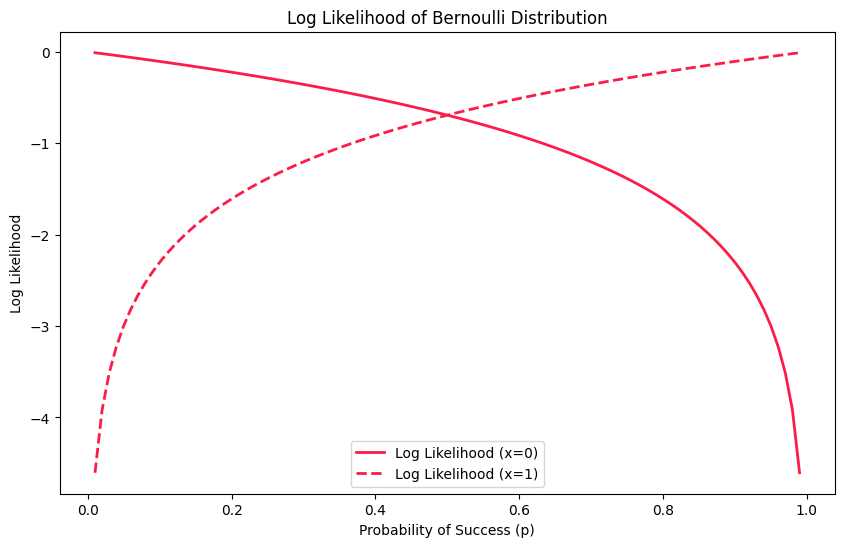

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 베르누이 분포의 성공 확률 p를 0에서 1까지 변화시키며 로그 우도 계산
p = np.linspace(0.01, 0.99, 100)

# 베르누이 시행 결과 (0 또는 1)
x = np.array([0, 1])

# 로그 우도 계산
log_likelihood_0 = np.log(1-p)
log_likelihood_1 = np.log(p)

plt.figure(figsize=(10, 6))

plt.plot(p, log_likelihood_0, color='#fc1c49', linewidth=2, label='Log Likelihood (x=0)')
plt.plot(p, log_likelihood_1, color='#fc1c49', linewidth=2, label='Log Likelihood (x=1)', linestyle='--')

plt.title("Log Likelihood of Bernoulli Distribution")
plt.xlabel("Probability of Success (p)")
plt.ylabel("Log Likelihood")
plt.legend()

plt.show()

### 학습 적용

In [5]:
elu_alpha = 1.0

def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

def elu(x: np.ndarray, alpha: float = 1.0) -> np.ndarray:
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def post_processing(predictions: np.ndarray) -> np.ndarray:
    return np.where(predictions < 0.5, 0, 1)

def display_results(input: np.ndarray, predictions: np.ndarray) -> None:
    processed_predictions = post_processing(predictions)
    print("Input (A, B) | Predicted Y")
    print("--------------------------")
    for i in range(inputs.shape[1]):
        print(f"  {inputs[0, i]}, {inputs[1, i]}       |      {processed_predictions[0, i]}")

def initialize_parameters() -> dict[str, np.ndarray]:
    parameters = {
        "W1": np.random.randn(2,2), # 가중치 | Input(2 units) -> Midden Layer(2 uniuts)
        "b1": np.zeros((2, 1)),     # 편향   | Hidden Layer(2 uniuts)
        "W2": np.random.randn(1,2), # 가중치 | Hidden Layer(2 units) -> Output(1 uniuts)
        "b2": np.zeros((1, 1)),     # 편향   | Output(1 uniuts)
    }
    return parameters


def compute_loss(Y: np.ndarray, Y_hat: np.ndarray) -> np.ndarray:
    # Negative Log Likelihood Loss
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)) / m
    return loss

def forward_propagation(
    X: np.ndarray,
    parameters : dict[str, np.ndarray],
    alpha: float = 1.0) -> tuple[np.ndarray, np.ndarray]:
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = elu(Z1, alpha=alpha)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return A1, A2

def backward_propagation(
    parameters : dict[str, np.ndarray],
    A1: np.ndarray,
    A2: np.ndarray,
    X: np.ndarray,
    Y: np.ndarray,
    alpha: float = 1.0,) -> dict[str, np.ndarray]:
    m = X.shape[1]
    W2 = parameters["W2"]

    dZ2 = (A2 - Y) * A2 * (1 - A2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2)
    dZ1[A1 <= 0] = dZ1[A1 <= 0] * alpha * np.exp(A1[A1 <= 0])

    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,
    }

    return gradients

def update_parameters(
    parameters : dict[str, np.ndarray],
    grads: dict[str, np.ndarray],
    learning_rate: float = 6.5,) -> dict[str, np.ndarray]:
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]

    return parameters

# XOR 문제
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
outputs = np.array([0, 1, 1, 0])

parameters = initialize_parameters()
predicted_outputs = forward_propagation(inputs, parameters, alpha=elu_alpha)[1]

display_results(inputs, predicted_outputs)

Input (A, B) | Predicted Y
--------------------------
  0, 0       |      1
  0, 1       |      1
  1, 0       |      0
  1, 1       |      0


In [7]:
for i in range(50000):
    A1, A2 = forward_propagation(inputs, parameters)
    grads = backward_propagation(parameters, A1, A2, inputs, outputs, alpha=elu_alpha)
    parameters = update_parameters(parameters, grads)
    loss = compute_loss(outputs, A2)

    if i > 0 and i % 10000 == 0:
        print(f"{i=}, {loss=}")

predicted_outputs = forward_propagation(inputs, parameters)[1]
print(predicted_outputs)
display_results(inputs, predicted_outputs)

i=10000, loss=np.float64(0.0016496835037954414)
i=20000, loss=np.float64(0.001325026339781926)
i=30000, loss=np.float64(0.0011349257728266293)
i=40000, loss=np.float64(0.001006791315485822)
[[1.04278674e-03 9.99175207e-01 9.99169029e-01 9.52134121e-04]]
Input (A, B) | Predicted Y
--------------------------
  0, 0       |      0
  0, 1       |      1
  1, 0       |      1
  1, 1       |      0


# 4-4. 과적합과 편향-분산

### 과적합과 편향-분산 트레이드오프
- 과대 적합 (Overfitting)
  - Validation에서 Loss가 극명하게 오르는 경우
- 과소 적합 (Underfitting)
  - Loss를 줄이지 못하는 경우
- 과적합 이유
  - 모델 복잡도 증가
  - 데이터가 적을 때
  - 데이터 노이즈가 많을 때
  - 너무 과도하게 길게 학습할 때
  - 학습과 테스트 데이터를 적절하게 분리하지 못했을 때
- 변향(Bias)과 분산(Variance)
  - 정의 : 예측값의 차이/퍼짐
  - 높을 때 : 과소/대적합 발생
  - 낮을 때 : (평균 오차)/퍼짐 적음
  - 적절한 경우 예측값이 정답에 근점

In [9]:
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 26.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset, random_split
import matplotlib.pyplot as plt

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
learning_rate = 0.001
total_data_size = 20000

cuda


In [21]:
def load_mnist_data(batch_size: int, train_size: int, val_size:int):
    train_data = torchvision.datasets.MNIST(root = './data', train=True, download = True, transform= transforms.ToTensor())
    subset_indices = list(range(total_data_size))
    mnist_subset = Subset(train_data, subset_indices)
    train_dataset, val_dataset = random_split(mnist_subset, [train_size, val_size])

    train_loader = torch.utils.data.DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset= val_dataset, batch_size= batch_size, shuffle=False)

    return train_loader, val_loader

def load_split_dataset(ratio : float):
    size_of_dataset = total_data_size
    return load_mnist_data(batch_size, int(size_of_dataset * ratio), size_of_dataset - int(size_of_dataset * ratio))

In [23]:
class Net(nn.Module):
    def __init__(self, input_size = 28 * 28, hidden_size = 500, num_classes = 10):
        super(Net, self).__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(model, device, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    return avg_loss

def evaluate(model, device, loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
    avg_loss = total_loss / len(loader)
    return avg_loss

train_data = 219, val_data = 94
Epoch 1, Train Loss: 0.4950, Validation Loss: 0.2857
Epoch 2, Train Loss: 0.2182, Validation Loss: 0.2105
Epoch 3, Train Loss: 0.1485, Validation Loss: 0.1947
Epoch 4, Train Loss: 0.1091, Validation Loss: 0.1554
Epoch 5, Train Loss: 0.0770, Validation Loss: 0.1434
Epoch 6, Train Loss: 0.0612, Validation Loss: 0.1300
Epoch 7, Train Loss: 0.0447, Validation Loss: 0.1235
Epoch 8, Train Loss: 0.0332, Validation Loss: 0.1315
Epoch 9, Train Loss: 0.0242, Validation Loss: 0.1238
Epoch 10, Train Loss: 0.0182, Validation Loss: 0.1277
Epoch 11, Train Loss: 0.0125, Validation Loss: 0.1256
Epoch 12, Train Loss: 0.0099, Validation Loss: 0.1311
Epoch 13, Train Loss: 0.0072, Validation Loss: 0.1237
Epoch 14, Train Loss: 0.0048, Validation Loss: 0.1210
Epoch 15, Train Loss: 0.0035, Validation Loss: 0.1234
Epoch 16, Train Loss: 0.0026, Validation Loss: 0.1256
Epoch 17, Train Loss: 0.0021, Validation Loss: 0.1286
Epoch 18, Train Loss: 0.0019, Validation Loss: 0.1290
Epoch

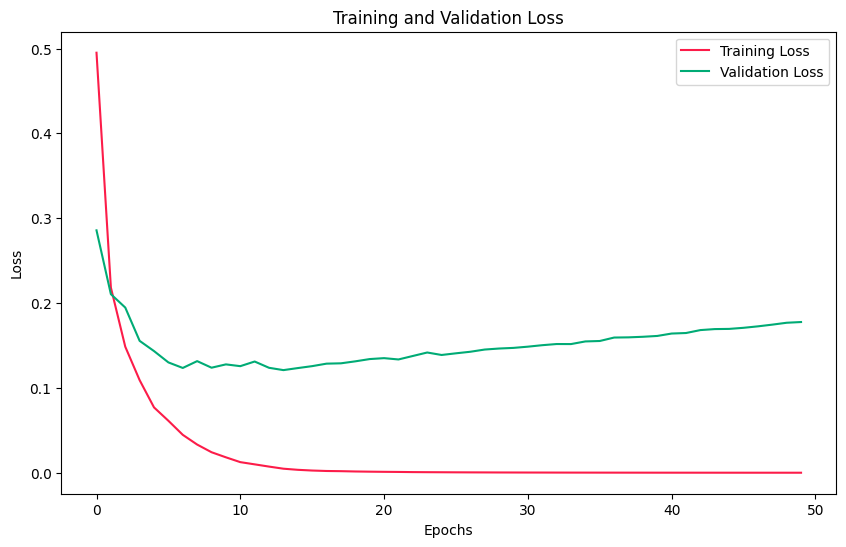

In [26]:
# Trade off

train_loader, val_loader = load_split_dataset(ratio=0.7)
print(f"train_data = {len(train_loader)}, val_data = {len(val_loader)}")

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_losses: list[float] = []
val_losses: list[float] = []
for epoch in range(50):
    train_loss = train(model, device, train_loader, optimizer, criterion)
    val_loss = evaluate(model, device, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='#fc1c49')
plt.plot(val_losses, label='Validation Loss', color='#00ab75')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

train_data = 157, val_data = 157
Epoch 1, Train Loss: 0.5684, Validation Loss: 0.3181
Epoch 2, Train Loss: 0.2557, Validation Loss: 0.2577
Epoch 3, Train Loss: 0.1811, Validation Loss: 0.2039
Epoch 4, Train Loss: 0.1335, Validation Loss: 0.1861
Epoch 5, Train Loss: 0.0979, Validation Loss: 0.1730
Epoch 6, Train Loss: 0.0747, Validation Loss: 0.1610
Epoch 7, Train Loss: 0.0556, Validation Loss: 0.1580
Epoch 8, Train Loss: 0.0418, Validation Loss: 0.1528
Epoch 9, Train Loss: 0.0298, Validation Loss: 0.1471
Epoch 10, Train Loss: 0.0222, Validation Loss: 0.1498
Epoch 11, Train Loss: 0.0169, Validation Loss: 0.1465
Epoch 12, Train Loss: 0.0139, Validation Loss: 0.1458
Epoch 13, Train Loss: 0.0092, Validation Loss: 0.1476
Epoch 14, Train Loss: 0.0066, Validation Loss: 0.1465
Epoch 15, Train Loss: 0.0051, Validation Loss: 0.1520
Epoch 16, Train Loss: 0.0044, Validation Loss: 0.1550
Epoch 17, Train Loss: 0.0036, Validation Loss: 0.1529
Epoch 18, Train Loss: 0.0030, Validation Loss: 0.1556
Epoc

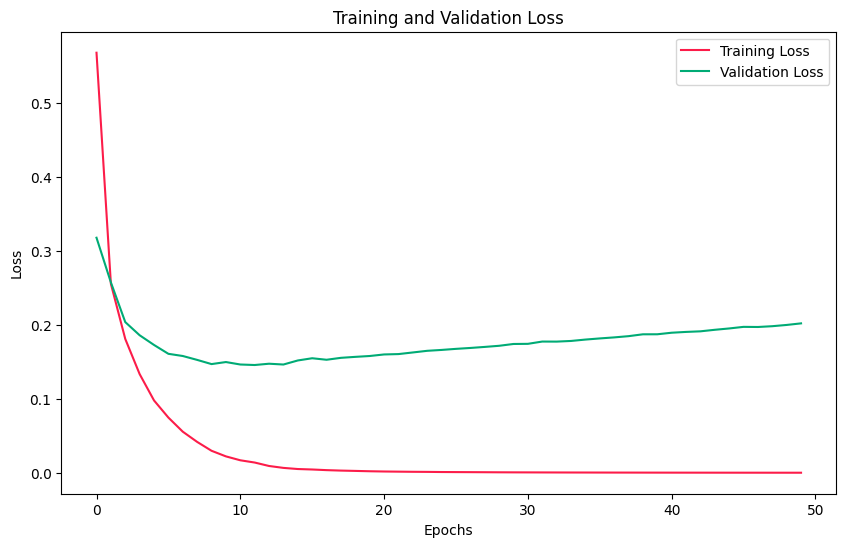

In [27]:
# Underfitting

train_loader, val_loader = load_split_dataset(ratio=0.5)
print(f"train_data = {len(train_loader)}, val_data = {len(val_loader)}")

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_losses_under: list[float] = []
val_losses_under: list[float] = []
for epoch in range(50):
    train_loss = train(model, device, train_loader, optimizer, criterion)
    val_loss = evaluate(model, device, val_loader, criterion)
    train_losses_under.append(train_loss)
    val_losses_under.append(val_loss)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(train_losses_under, label='Training Loss', color='#fc1c49')
plt.plot(val_losses_under, label='Validation Loss', color='#00ab75')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

train_data = 310, val_data = 4
Epoch 1, Train Loss: 0.4192, Validation Loss: 0.2118
Epoch 2, Train Loss: 0.1863, Validation Loss: 0.1666
Epoch 3, Train Loss: 0.1203, Validation Loss: 0.1238
Epoch 4, Train Loss: 0.0853, Validation Loss: 0.1032
Epoch 5, Train Loss: 0.0624, Validation Loss: 0.0809
Epoch 6, Train Loss: 0.0442, Validation Loss: 0.0820
Epoch 7, Train Loss: 0.0313, Validation Loss: 0.0750
Epoch 8, Train Loss: 0.0237, Validation Loss: 0.0745
Epoch 9, Train Loss: 0.0169, Validation Loss: 0.0636
Epoch 10, Train Loss: 0.0122, Validation Loss: 0.0670
Epoch 11, Train Loss: 0.0078, Validation Loss: 0.0861
Epoch 12, Train Loss: 0.0057, Validation Loss: 0.0802
Epoch 13, Train Loss: 0.0045, Validation Loss: 0.0626
Epoch 14, Train Loss: 0.0030, Validation Loss: 0.0907
Epoch 15, Train Loss: 0.0073, Validation Loss: 0.0822
Epoch 16, Train Loss: 0.0171, Validation Loss: 0.0789
Epoch 17, Train Loss: 0.0118, Validation Loss: 0.0677
Epoch 18, Train Loss: 0.0026, Validation Loss: 0.0601
Epoch 

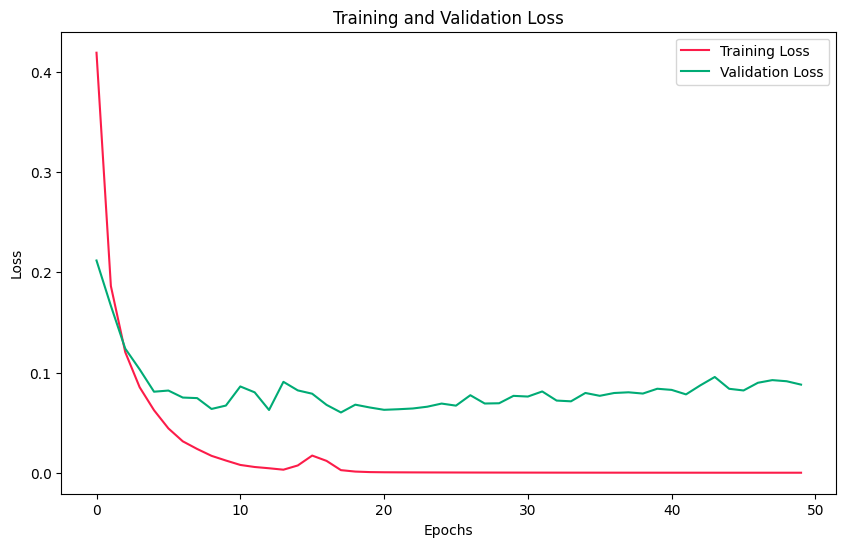

In [29]:
# Overfitting

train_loader, val_loader = load_split_dataset(ratio=0.99)
print(f"train_data = {len(train_loader)}, val_data = {len(val_loader)}")

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_losses_over: list[float] = []
val_losses_over: list[float] = []
for epoch in range(50):
    train_loss = train(model, device, train_loader, optimizer, criterion)
    val_loss = evaluate(model, device, val_loader, criterion)
    train_losses_over.append(train_loss)
    val_losses_over.append(val_loss)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(train_losses_over, label='Training Loss', color='#fc1c49')
plt.plot(val_losses_over, label='Validation Loss', color='#00ab75')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

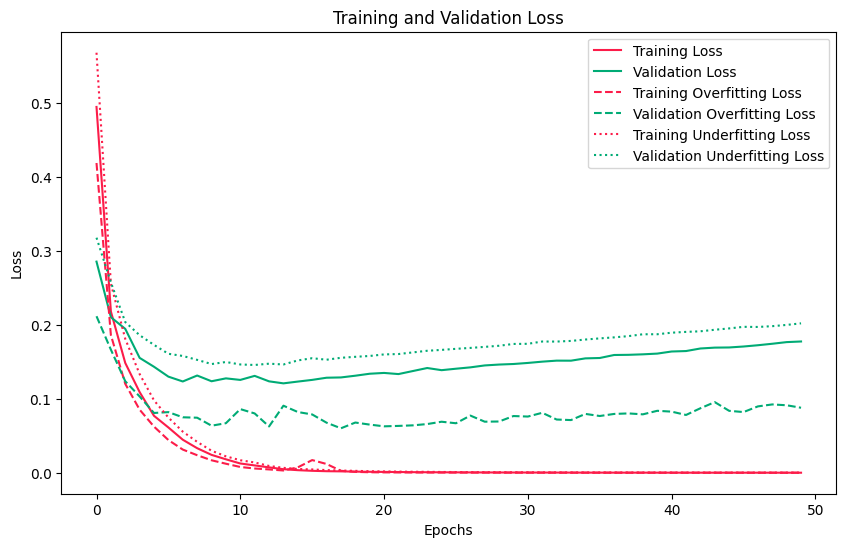

In [30]:

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='#fc1c49')
plt.plot(val_losses, label='Validation Loss', color='#00ab75')

plt.plot(train_losses_over, label='Training Overfitting Loss', color='#fc1c49', linestyle='--')
plt.plot(val_losses_over, label='Validation Overfitting Loss', color='#00ab75', linestyle='--')

plt.plot(train_losses_under, label='Training Underfitting Loss', color='#fc1c49', linestyle=':')
plt.plot(val_losses_under, label='Validation Underfitting Loss', color='#00ab75', linestyle=':')

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()